In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!pwd
import os
os.chdir('drive/My Drive/Colab Notebooks/Machine Learning/Heroku-Price-Prediction')
!pwd

/content
/content/drive/My Drive/Colab Notebooks/Machine Learning/Heroku-Price-Prediction


In [50]:
import pandas as pd

In [117]:
df=pd.read_csv('car_data.csv')

In [118]:
df.shape

(301, 9)

In [119]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [120]:
# Transform price from lahk ruppe to USD
df['Selling_Price'] = round((df['Selling_Price'] * 100000) / 74.28)
df['Present_Price'] = round((df['Present_Price'] * 100000) / 74.28)

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,4510.0,7526.0,27000,Petrol,Dealer,Manual,0
1,sx4,2013,6395.0,12843.0,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,9760.0,13261.0,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,3837.0,5587.0,5200,Petrol,Dealer,Manual,0
4,swift,2014,6193.0,9249.0,42450,Diesel,Dealer,Manual,0


In [121]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [122]:
##check missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [123]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,6275.322259,10269.940199,36947.205980,0.043189
std,2.891554,6842.748847,11637.179330,38886.883882,0.247915
min,2003.000000,135.000000,431.000000,500.000000,0.000000
25%,2012.000000,1212.000000,1616.000000,15000.000000,0.000000
50%,2014.000000,4847.000000,8616.000000,32000.000000,0.000000
75%,2016.000000,8078.000000,13328.000000,48767.000000,0.000000
max,2018.000000,47119.000000,124663.000000,500000.000000,3.000000


In [124]:
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [125]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,4510.0,7526.0,27000,Petrol,Dealer,Manual,0
1,2013,6395.0,12843.0,43000,Diesel,Dealer,Manual,0
2,2017,9760.0,13261.0,6900,Petrol,Dealer,Manual,0
3,2011,3837.0,5587.0,5200,Petrol,Dealer,Manual,0
4,2014,6193.0,9249.0,42450,Diesel,Dealer,Manual,0


In [126]:
final_dataset['Current Year']=2020

In [127]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,4510.0,7526.0,27000,Petrol,Dealer,Manual,0,2020
1,2013,6395.0,12843.0,43000,Diesel,Dealer,Manual,0,2020
2,2017,9760.0,13261.0,6900,Petrol,Dealer,Manual,0,2020
3,2011,3837.0,5587.0,5200,Petrol,Dealer,Manual,0,2020
4,2014,6193.0,9249.0,42450,Diesel,Dealer,Manual,0,2020


In [128]:
final_dataset['no_year']=final_dataset['Current Year']- final_dataset['Year']

In [129]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_year
0,2014,4510.0,7526.0,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,6395.0,12843.0,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,9760.0,13261.0,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,3837.0,5587.0,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,6193.0,9249.0,42450,Diesel,Dealer,Manual,0,2020,6


In [130]:
final_dataset.drop(['Year'],axis=1,inplace=True)
final_dataset.drop(['Current Year'],axis=1,inplace=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,4510.0,7526.0,27000,Petrol,Dealer,Manual,0,6
1,6395.0,12843.0,43000,Diesel,Dealer,Manual,0,7
2,9760.0,13261.0,6900,Petrol,Dealer,Manual,0,3
3,3837.0,5587.0,5200,Petrol,Dealer,Manual,0,9
4,6193.0,9249.0,42450,Diesel,Dealer,Manual,0,6


In [131]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,4510.0,7526.0,27000,0,6,0,1,0,1
1,6395.0,12843.0,43000,0,7,1,0,0,1
2,9760.0,13261.0,6900,0,3,0,1,0,1
3,3837.0,5587.0,5200,0,9,0,1,0,1
4,6193.0,9249.0,42450,0,6,1,0,0,1


In [132]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878982,0.029185,-0.088343,-0.236143,0.552338,-0.540569,-0.550721,-0.367131
Present_Price,0.878982,1.000000,0.203649,0.008059,0.047587,0.473306,-0.465243,-0.512034,-0.348714
Kms_Driven,0.029185,0.203649,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088343,0.008059,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236143,0.047587,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552338,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540569,-0.465243,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550721,-0.512034,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367131,-0.348714,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

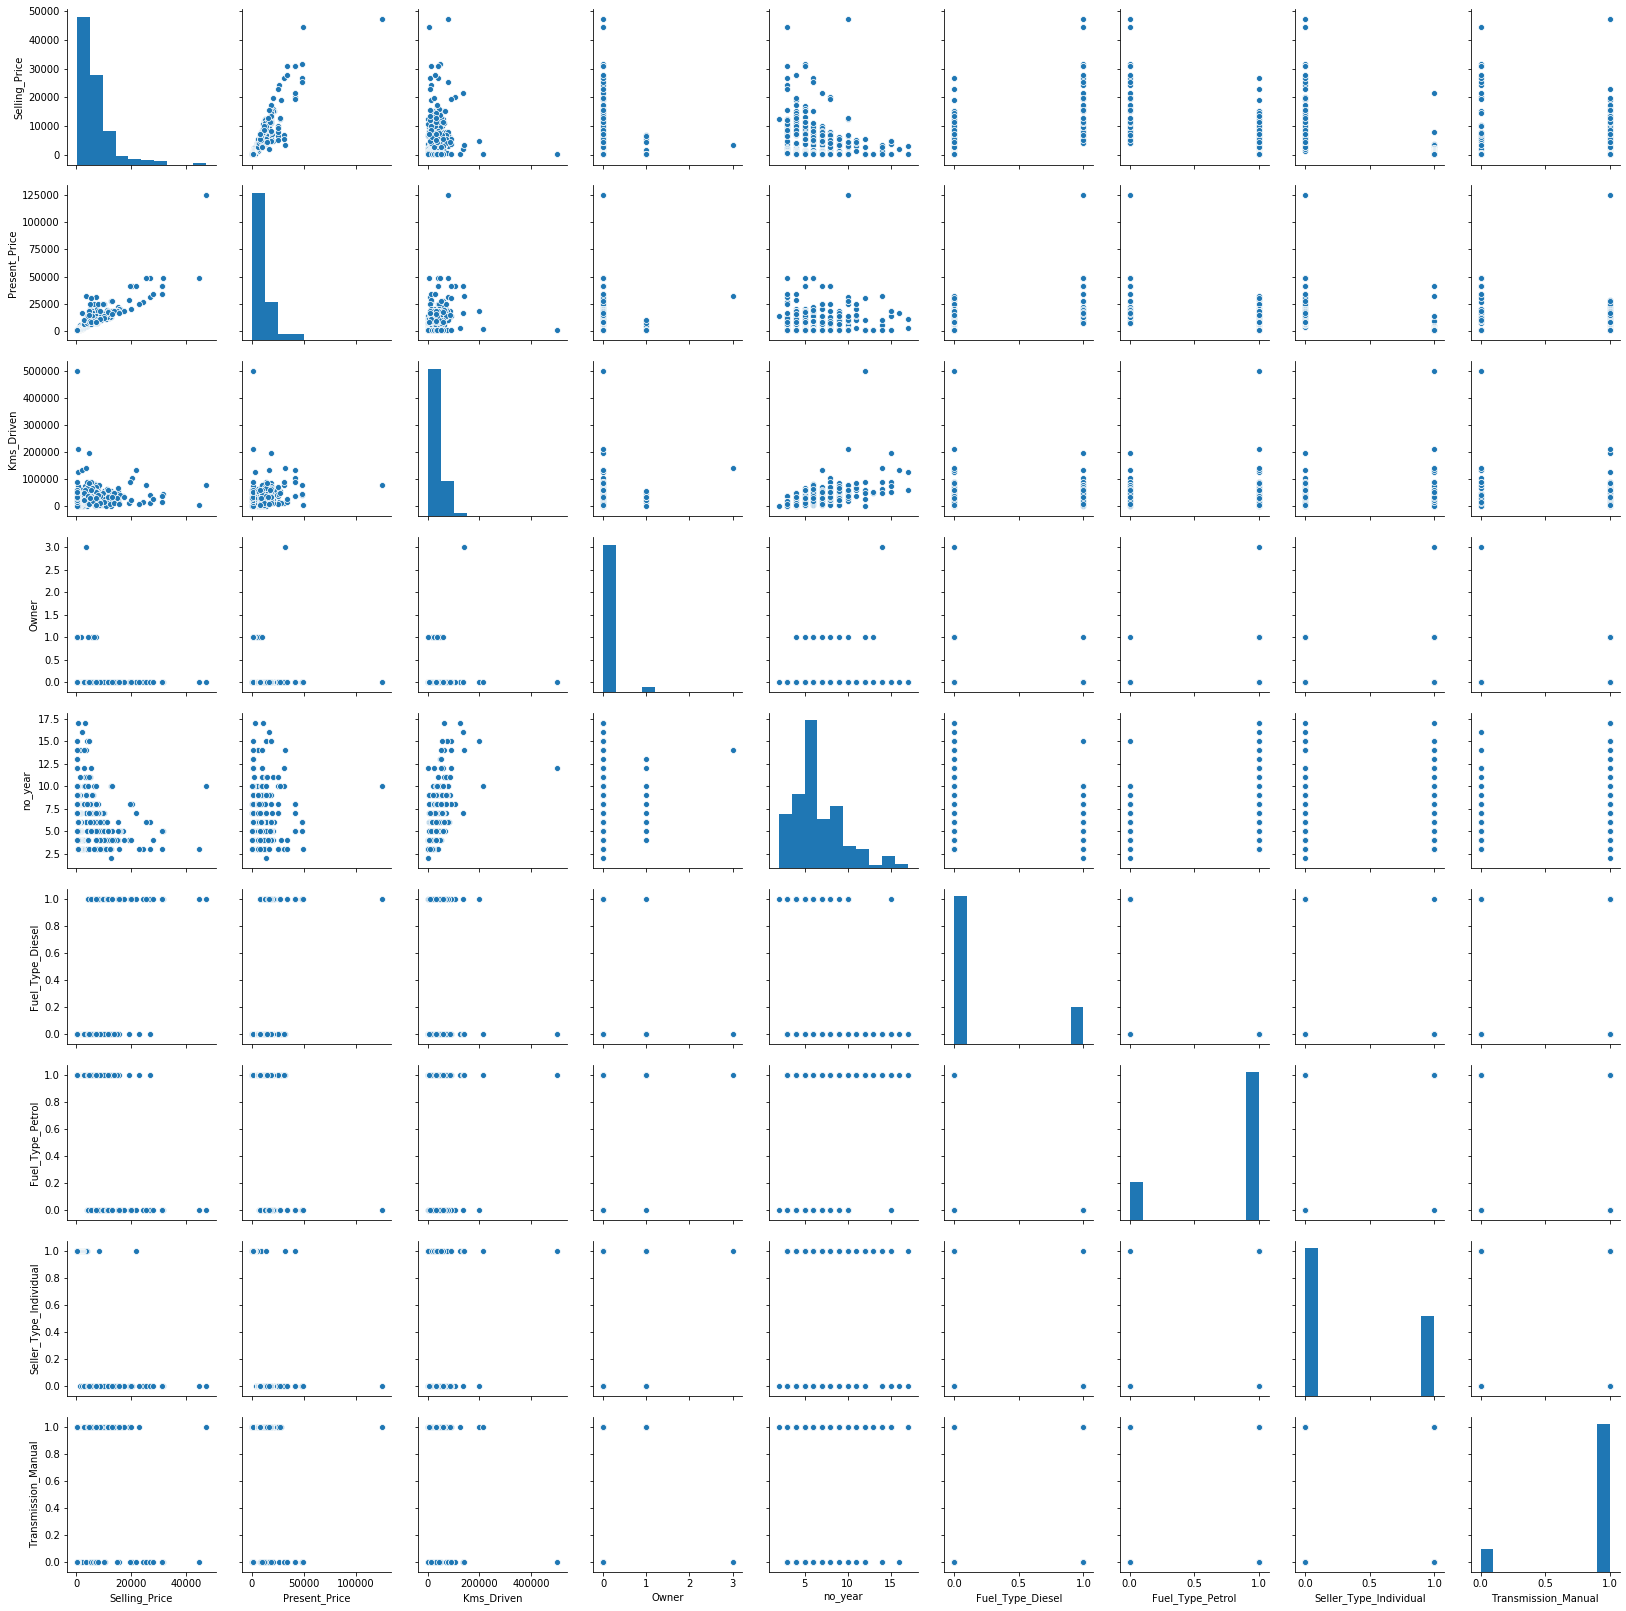

In [134]:
sns.pairplot(final_dataset)

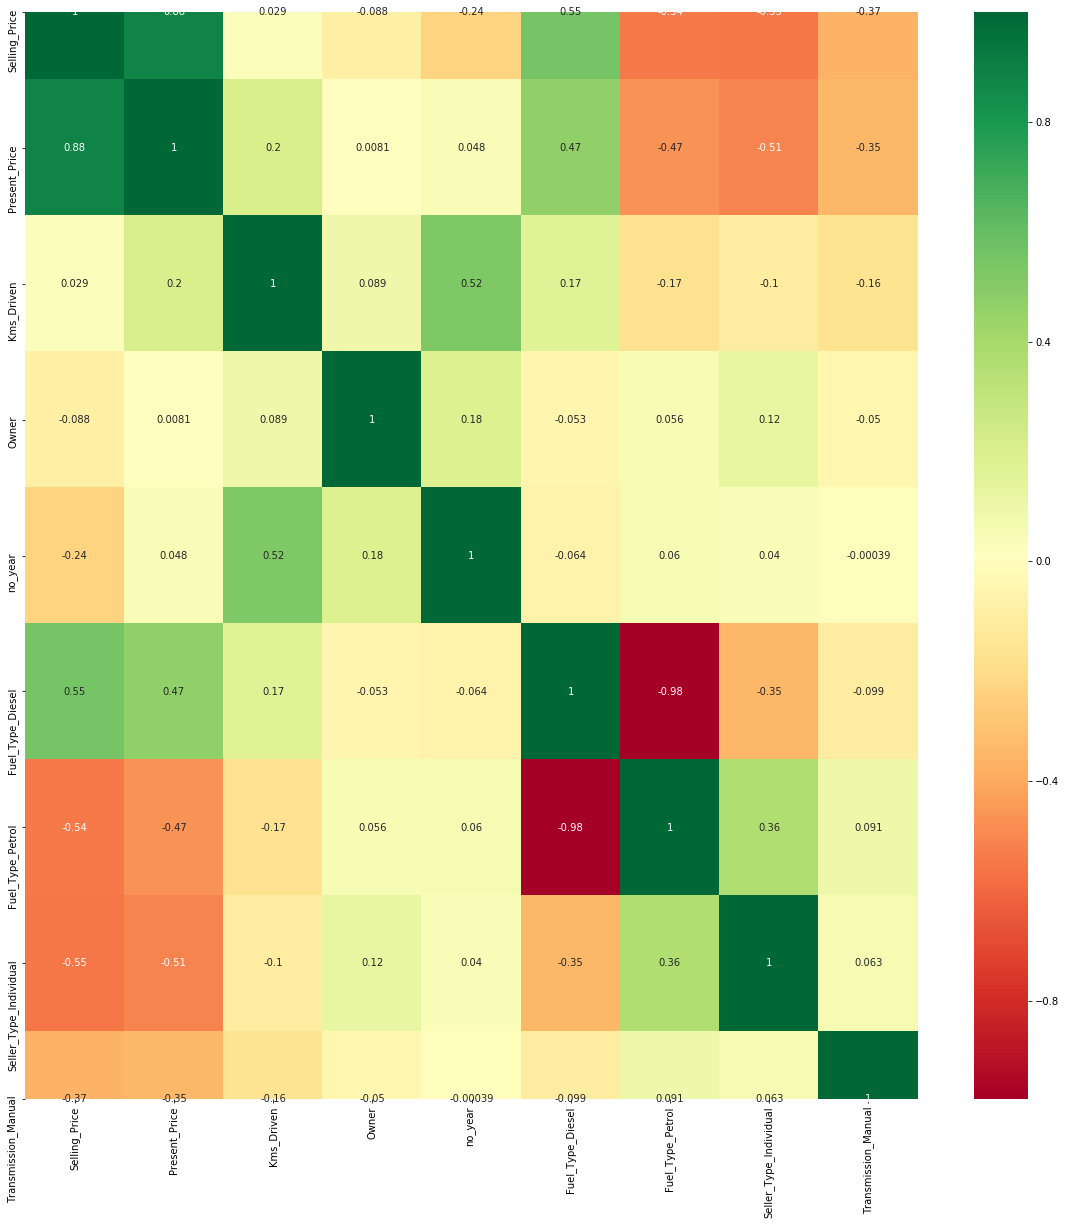

In [135]:

import seaborn as sns
#get correlations of each features in dataset
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [136]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]


In [137]:
X['Owner'].unique()

array([0, 1, 3])

In [138]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [139]:
print(model.feature_importances_)

[0.45510515 0.03965545 0.00046469 0.07174232 0.15785546 0.01390054
 0.14111131 0.12016508]


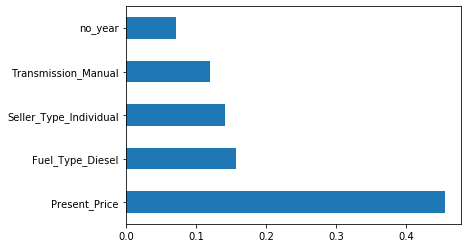

In [140]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [142]:
from sklearn.ensemble import RandomForestRegressor

In [143]:
regressor=RandomForestRegressor()

In [144]:
# Hyperparameters
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [145]:
from sklearn.model_selection import RandomizedSearchCV

In [146]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [147]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [148]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [149]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [150]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [151]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [152]:
rf_random.best_score_

-7217533.600331191

In [153]:
predictions=rf_random.predict(X_test)

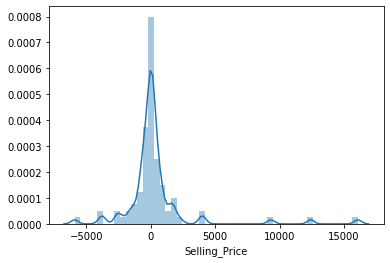

In [154]:
sns.distplot(y_test-predictions)

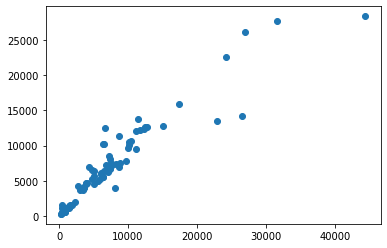

In [155]:
plt.scatter(y_test,predictions)

In [156]:
from sklearn import metrics

In [157]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1197.7053846153847
MSE: 7244268.373632506
RMSE: 2691.517856829582


In [158]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [159]:
ls


Price-Prediction.ipynb              main.py*
Procfile*                           random_forest_regression_model.pkl
README.md*                          requirements.txt*
app.py*                             templates/
car_data.csv
